# **Week 12: Project Deliverables**
 
**Team member's details:**

**Group Name :** Banana Peels
**Names: **Devika Chandnani, Dylan Huey, Camillo, Farha Jabin Oyshee

**Email:** devika.chandnani@gmail.com, dylan94539@gmail.com, fj.oyshee@gmail.com

**Country:** United States,Bangladesh

**College/Company:** Fordham University,Independent University, Bangladesh, University of Illinois at Urbana Champaign

**Specialization:** Data Science

**Link to the data:** [UCI](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)


# **Problem Statement:**

ABC Bank wants to sell it's term deposit product to customers and before launching the product they want to develop a model which help them in understanding whether a particular customer will buy their product or not (based on customer's past interaction with bank or other Financial Institution).

## **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np

# Machine Learning Phase
import sklearn 
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#Metrics Phase
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

#Visualization Phase
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
import matplotlib.pyplot
%matplotlib inline
pd.set_option('display.max_columns', 500)
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

## **Input Data**

In [ ]:
from google.colab import files
files.upload()

Saving bank-full.csv to bank-full (1).csv


{'bank-full.csv': b'"age";"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"\r\n58;"management";"married";"tertiary";"no";2143;"yes";"no";"unknown";5;"may";261;1;-1;0;"unknown";"no"\r\n44;"technician";"single";"secondary";"no";29;"yes";"no";"unknown";5;"may";151;1;-1;0;"unknown";"no"\r\n33;"entrepreneur";"married";"secondary";"no";2;"yes";"yes";"unknown";5;"may";76;1;-1;0;"unknown";"no"\r\n47;"blue-collar";"married";"unknown";"no";1506;"yes";"no";"unknown";5;"may";92;1;-1;0;"unknown";"no"\r\n33;"unknown";"single";"unknown";"no";1;"no";"no";"unknown";5;"may";198;1;-1;0;"unknown";"no"\r\n35;"management";"married";"tertiary";"no";231;"yes";"no";"unknown";5;"may";139;1;-1;0;"unknown";"no"\r\n28;"management";"single";"tertiary";"no";447;"yes";"yes";"unknown";5;"may";217;1;-1;0;"unknown";"no"\r\n42;"entrepreneur";"divorced";"tertiary";"yes";2;"yes";"no";"unknown";5;"may";380;1;-1;0;"unknown";"no"\r\

In [ ]:
bank_full =pd.read_csv('bank-full.csv',delimiter=';')
bank_full.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [ ]:
bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
bank_full.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
bank_full.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [ ]:
from google.colab import files
files.upload()

Saving bank-additional.csv to bank-additional (1).csv


{'bank-additional.csv': b'"age";"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"\r\n30;"blue-collar";"married";"basic.9y";"no";"yes";"no";"cellular";"may";"fri";487;2;999;0;"nonexistent";-1.8;92.893;-46.2;1.313;5099.1;"no"\r\n39;"services";"single";"high.school";"no";"no";"no";"telephone";"may";"fri";346;4;999;0;"nonexistent";1.1;93.994;-36.4;4.855;5191;"no"\r\n25;"services";"married";"high.school";"no";"yes";"no";"telephone";"jun";"wed";227;1;999;0;"nonexistent";1.4;94.465;-41.8;4.962;5228.1;"no"\r\n38;"services";"married";"basic.9y";"no";"unknown";"unknown";"telephone";"jun";"fri";17;3;999;0;"nonexistent";1.4;94.465;-41.8;4.959;5228.1;"no"\r\n47;"admin.";"married";"university.degree";"no";"yes";"no";"cellular";"nov";"mon";58;1;999;0;"nonexistent";-0.1;93.2;-42;4.191;5195.8;"no"\r\n32;"services";"single";"university.deg

In [ ]:
bank_additional_full =pd.read_csv('bank-additional.csv',delimiter=';')
bank_additional_full.head()

age          job  marital          education default  housing     loan  \
0   30  blue-collar  married           basic.9y      no      yes       no   
1   39     services   single        high.school      no       no       no   
2   25     services  married        high.school      no      yes       no   
3   38     services  married           basic.9y      no  unknown  unknown   
4   47       admin.  married  university.degree      no      yes       no   

     contact month day_of_week  duration  campaign  pdays  previous  \
0   cellular   may         fri       487         2    999         0   
1  telephone   may         fri       346         4    999         0   
2  telephone   jun         wed       227         1    999         0   
3  telephone   jun         fri        17         3    999         0   
4   cellular   nov         mon        58         1    999         0   

      poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0  nonexistent          -1.8          92.893          -46.2      1.313   
1  nonexistent           1.1          93.994          -36.4      4.855   
2  nonexistent           1.4          94.465          -41.8      4.962   
3  nonexistent           1.4          94.465          -41.8      4.959   
4  nonexistent          -0.1          93.200          -42.0      4.191   

   nr.employed   y  
0       5099.1  no  
1       5191.0  no  
2       5228.1  no  
3       5228.1  no  
4       5195.8  no

In [ ]:
bank_additional_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [ ]:
bank_additional_full.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
bank_additional_full.describe()

age     duration     campaign        pdays     previous  \
count  4119.000000  4119.000000  4119.000000  4119.000000  4119.000000   
mean     40.113620   256.788055     2.537266   960.422190     0.190337   
std      10.313362   254.703736     2.568159   191.922786     0.541788   
min      18.000000     0.000000     1.000000     0.000000     0.000000   
25%      32.000000   103.000000     1.000000   999.000000     0.000000   
50%      38.000000   181.000000     2.000000   999.000000     0.000000   
75%      47.000000   317.000000     3.000000   999.000000     0.000000   
max      88.000000  3643.000000    35.000000   999.000000     6.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx    euribor3m  nr.employed  
count   4119.000000     4119.000000    4119.000000  4119.000000  4119.000000  
mean       0.084972       93.579704     -40.499102     3.621356  5166.481695  
std        1.563114        0.579349       4.594578     1.733591    73.667904  
min       -3.400000       92.201000     -50.800000     0.635000  4963.600000  
25%       -1.800000       93.075000     -42.700000     1.334000  5099.100000  
50%        1.100000       93.749000     -41.800000     4.857000  5191.000000  
75%        1.400000       93.994000     -36.400000     4.961000  5228.100000  
max        1.400000       94.767000     -26.900000     5.045000  5228.100000

# **Feature Engineering**

### **Correlation plot of attributes**





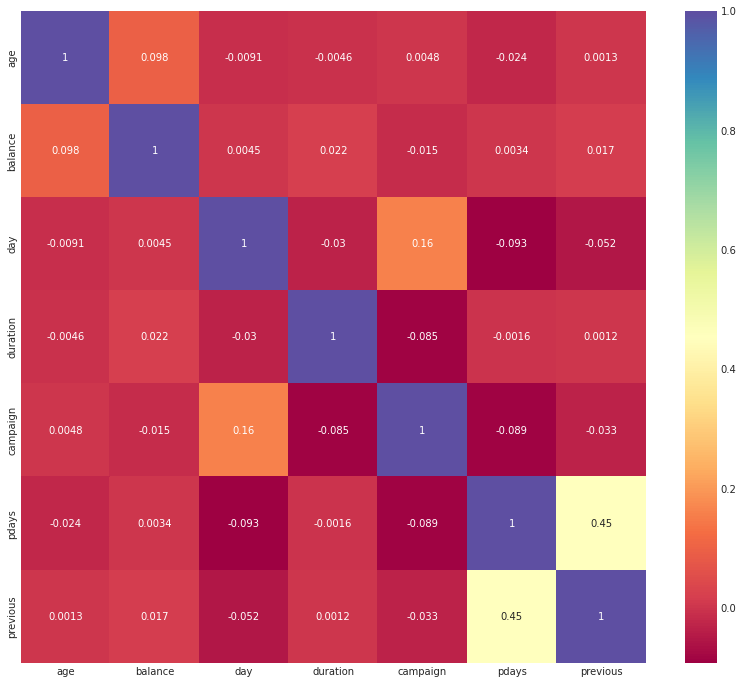

In [ ]:
plt.figure(figsize=(14, 12))
sns.heatmap(bank_full.corr(), annot=True, cmap='Spectral')
plt.show()

# **Highly Correlated Variables**

**Insights:**
* Indicators are correlated with one another
* Employee variation rate is highly correlated with the number of employees
* The consumer price index is highly correlated with the bank interest rate (the higher the index, the higher the interest rate)
* The employee variation rate is also correlated with the interest rate at the bank employee variation rate is also correlated with the interest rate at the bank


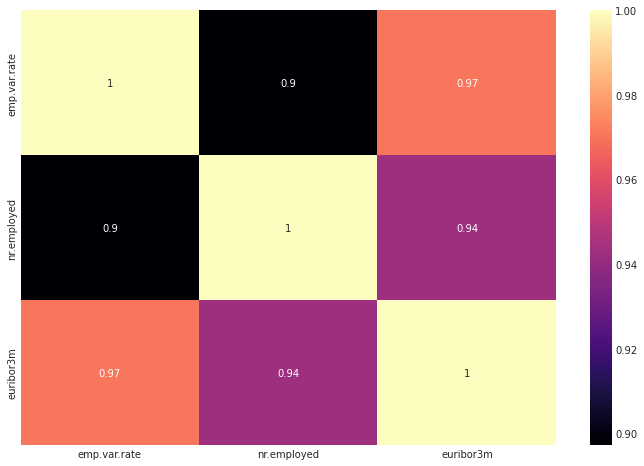

In [ ]:
sns.heatmap(bank_additional_full[["emp.var.rate", "nr.employed", "euribor3m"]].corr(), annot=True, cmap='magma')
plt.show()

**Insights:**

*The high positive correlation between:*

* '*emp.var.rate*' and '*nr.employed*'

* '*emp.var.rate*' and '*euribor3m*'

* '*euribor3m*' and '*nr.employed*'

- The Euro Interbank Offered Rate, or Euribor, is the rate offered between European banks. It represents the interest rate at which credit institutions lend money to one another.

- This feature allows us to state that 'emp.var.rate' (employment variation rate) and 'nr.employed' (number of employees) correlate positively with euribor. In this case, we will drop 'emp.var.rate' and 'nr.employed' as well as 'euribor' and get the current market price of money.





In [ ]:
bank_additional_full.drop(['emp.var.rate', 'nr.employed'], axis = 1, inplace=True)

In [ ]:
print(bank_additional_full.shape)
bank_additional_full.head()

(4119, 19)


age          job  marital          education default  housing     loan  \
0   30  blue-collar  married           basic.9y      no      yes       no   
1   39     services   single        high.school      no       no       no   
2   25     services  married        high.school      no      yes       no   
3   38     services  married           basic.9y      no  unknown  unknown   
4   47       admin.  married  university.degree      no      yes       no   

     contact month day_of_week  duration  campaign  pdays  previous  \
0   cellular   may         fri       487         2    999         0   
1  telephone   may         fri       346         4    999         0   
2  telephone   jun         wed       227         1    999         0   
3  telephone   jun         fri        17         3    999         0   
4   cellular   nov         mon        58         1    999         0   

      poutcome  cons.price.idx  cons.conf.idx  euribor3m   y  
0  nonexistent          92.893          -46.2      1.313  no  
1  nonexistent          93.994          -36.4      4.855  no  
2  nonexistent          94.465          -41.8      4.962  no  
3  nonexistent          94.465          -41.8      4.959  no  
4  nonexistent          93.200          -42.0      4.191  no

## **Outliers**


There is a significant impact of outliers on the Mean and Variance. In this case, it becomes necessary to take into account the outliers. Outliers are primarily visible in the following two features:


In [ ]:
bank_additional_full[["age", "campaign"]].describe()

age     campaign
count  4119.000000  4119.000000
mean     40.113620     2.537266
std      10.313362     2.568159
min      18.000000     1.000000
25%      32.000000     1.000000
50%      38.000000     2.000000
75%      47.000000     3.000000
max      88.000000    35.000000

The “age" and "campaign" are skewed to the right, and therefore, we will compute an Inter-Quartile Range (IQR) and replace outliers with lower and upper boundaries.

In [ ]:
numerical_features=['age','campaign','duration']
for cols in numerical_features:
    Q1 = bank_additional_full[cols].quantile(0.25)
    Q3 = bank_additional_full[cols].quantile(0.75)
    IQR = Q3 - Q1     

    filter = (bank_additional_full[cols] >= Q1 - 1.5 * IQR) & (bank_additional_full[cols] <= Q3 + 1.5 *IQR)
    bank_additional_full=bank_additional_full.loc[filter]

Text(0.5, 1.0, 'campaign')

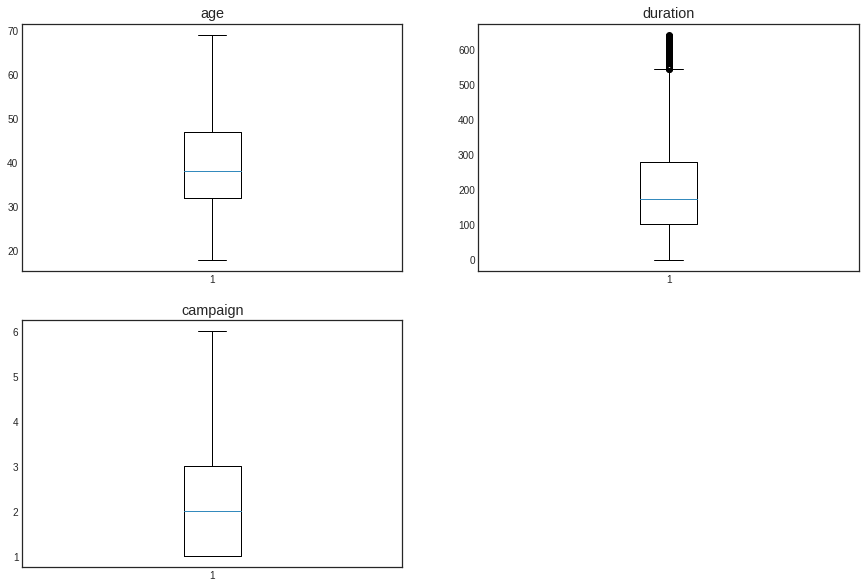

In [ ]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(bank_additional_full['age'])
ax.set_title('age')
ax=plt.subplot(222)
plt.boxplot(bank_additional_full['duration'])
ax.set_title('duration')
ax=plt.subplot(223)
plt.boxplot(bank_additional_full['campaign'])
ax.set_title('campaign')

### **Categorical Features Encoding**


Machine learning algorithms can only read numerical values. In order to encode categorical features into numerical values, it is essential to encode them


In [ ]:
target = 'y'
features = [c for c in bank_additional_full.columns if c != target]
len(features)

18

In [ ]:
cat_cols = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
num_cols = [c for c in features if c not in cat_cols]
num_cols

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m']

In [ ]:
# check categorical class
for i in cat_cols:
    print(i, ":", bank_additional_full[i].unique())

job : ['blue-collar' 'services' 'admin.' 'entrepreneur' 'self-employed'
 'technician' 'management' 'student' 'housemaid' 'retired' 'unemployed'
 'unknown']
marital : ['married' 'single' 'divorced' 'unknown']
education : ['basic.9y' 'high.school' 'university.degree' 'professional.course'
 'basic.6y' 'basic.4y' 'unknown' 'illiterate']
default : ['no' 'unknown' 'yes']
housing : ['yes' 'no' 'unknown']
loan : ['no' 'unknown' 'yes']
contact : ['cellular' 'telephone']
month : ['may' 'jun' 'nov' 'sep' 'jul' 'aug' 'mar' 'oct' 'apr' 'dec']
day_of_week : ['fri' 'wed' 'mon' 'thu' 'tue']
poutcome : ['nonexistent' 'failure' 'success']


**Label Encoder Initialization**

In [ ]:
# Label Encoder Initialization
l_e = LabelEncoder()

# iterating through each categorical feature and label encoding them

for feature in cat_cols:
    bank_additional_full[feature] = l_e.fit_transform(bank_additional_full[feature])

In [ ]:
# label encoded dataset
bank_additional_full.head()

age  job  marital  education  default  housing  loan  contact  month  \
0   30    1        1          2        0        2     0        0      6   
1   39    7        2          3        0        0     0        1      6   
2   25    7        1          3        0        2     0        1      4   
3   38    7        1          2        0        1     1        1      4   
4   47    0        1          6        0        2     0        0      7   

   day_of_week  duration  campaign  pdays  previous  poutcome  cons.price.idx  \
0            0       487         2    999         0         1          92.893   
1            0       346         4    999         0         1          93.994   
2            4       227         1    999         0         1          94.465   
3            0        17         3    999         0         1          94.465   
4            1        58         1    999         0         1          93.200   

   cons.conf.idx  euribor3m   y  
0          -46.2      1.313  no  
1          -36.4      4.855  no  
2          -41.8      4.962  no  
3          -41.8      4.959  no  
4          -42.0      4.191  no

In [ ]:
#The mapping of the target variable into binary yes/no values
def target_variable_binary(y):
    y = y.replace({"yes":1,"no":0},inplace=True)

In [ ]:
target_variable_binary(bank_additional_full['y'])
  

In [ ]:
bank_additional_full.head()

age  job  marital  education  default  housing  loan  contact  month  \
0   30    1        1          2        0        2     0        0      6   
1   39    7        2          3        0        0     0        1      6   
2   25    7        1          3        0        2     0        1      4   
3   38    7        1          2        0        1     1        1      4   
4   47    0        1          6        0        2     0        0      7   

   day_of_week  duration  campaign  pdays  previous  poutcome  cons.price.idx  \
0            0       487         2    999         0         1          92.893   
1            0       346         4    999         0         1          93.994   
2            4       227         1    999         0         1          94.465   
3            0        17         3    999         0         1          94.465   
4            1        58         1    999         0         1          93.200   

   cons.conf.idx  euribor3m  y  
0          -46.2      1.313  0  
1          -36.4      4.855  0  
2          -41.8      4.962  0  
3          -41.8      4.959  0  
4          -42.0      4.191  0

In [ ]:
bank_additional_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3573 entries, 0 to 4118
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3573 non-null   int64  
 1   job             3573 non-null   int64  
 2   marital         3573 non-null   int64  
 3   education       3573 non-null   int64  
 4   default         3573 non-null   int64  
 5   housing         3573 non-null   int64  
 6   loan            3573 non-null   int64  
 7   contact         3573 non-null   int64  
 8   month           3573 non-null   int64  
 9   day_of_week     3573 non-null   int64  
 10  duration        3573 non-null   int64  
 11  campaign        3573 non-null   int64  
 12  pdays           3573 non-null   int64  
 13  previous        3573 non-null   int64  
 14  poutcome        3573 non-null   int64  
 15  cons.price.idx  3573 non-null   float64
 16  cons.conf.idx   3573 non-null   float64
 17  euribor3m       3573 non-null   f

### **Feature-Variable Correlation**

All numerical variables are now included in the data, allowing us to examine any correlation between them 

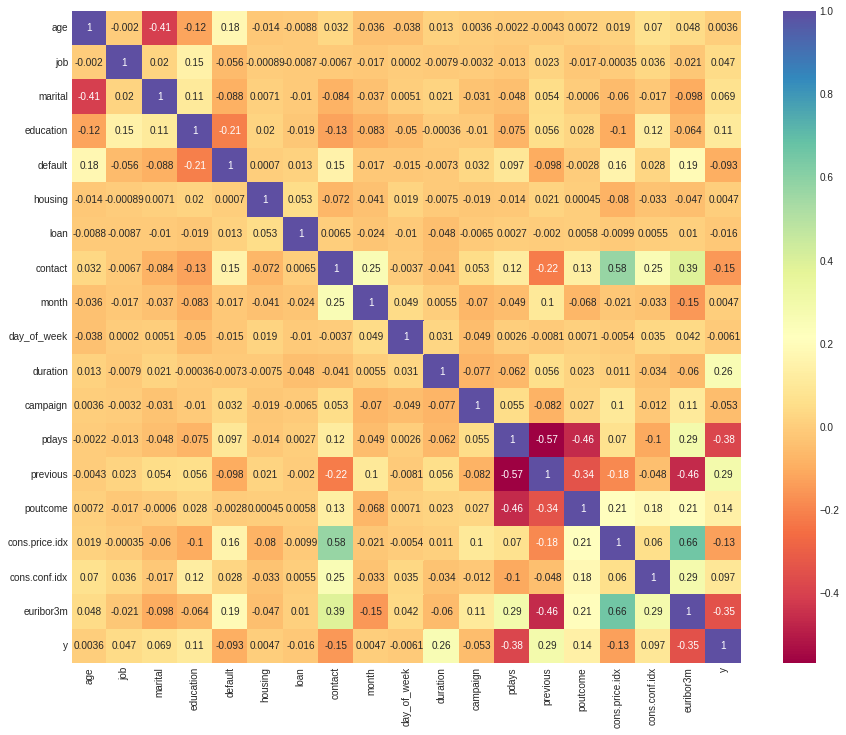

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(bank_additional_full.corr(), annot=True, cmap='Spectral')

No features are highly correlated or inversely correlated.

As a result, we could have written the condition that if the correlation is greater than 0.8 (or other threshold value depending on the domain knowledge) and less than -0.8, then those features could be dropped.


In [ ]:
bank_additional_full.corr()['y'].sort_values(ascending = False)

y                 1.000000
previous          0.290647
duration          0.260138
poutcome          0.137278
education         0.107732
cons.conf.idx     0.097169
marital           0.068702
job               0.047457
housing           0.004701
month             0.004672
age               0.003612
day_of_week      -0.006052
loan             -0.016254
campaign         -0.052695
default          -0.092575
cons.price.idx   -0.132448
contact          -0.149967
euribor3m        -0.346634
pdays            -0.380988
Name: y, dtype: float64

In [ ]:
data = bank_additional_full.to_csv(r'C:\Users\ACER\Documents\GitHub\Internship--Data-Glacier\Week 12\bank_final_dataset.csv', index = None, header=True)

### **Model Building**

In [ ]:
### Model Building
df = pd.read_csv(r'C:\Users\ACER\Documents\GitHub\Internship--Data-Glacier\Week 12\bank_final_dataset.csv')
df.head()

age  job  marital  education  default  housing  loan  contact  month  \
0   30    1        1          2        0        2     0        0      6   
1   39    7        2          3        0        0     0        1      6   
2   25    7        1          3        0        2     0        1      4   
3   38    7        1          2        0        1     1        1      4   
4   47    0        1          6        0        2     0        0      7   

   day_of_week  duration  campaign  pdays  previous  poutcome  cons.price.idx  \
0            0       487         2    999         0         1          92.893   
1            0       346         4    999         0         1          93.994   
2            4       227         1    999         0         1          94.465   
3            0        17         3    999         0         1          94.465   
4            1        58         1    999         0         1          93.200   

   cons.conf.idx  euribor3m  y  
0          -46.2      1.313  0  
1          -36.4      4.855  0  
2          -41.8      4.962  0  
3          -41.8      4.959  0  
4          -42.0      4.191  0

In [ ]:
df.shape

(3573, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3573 entries, 0 to 3572
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3573 non-null   int64  
 1   job             3573 non-null   int64  
 2   marital         3573 non-null   int64  
 3   education       3573 non-null   int64  
 4   default         3573 non-null   int64  
 5   housing         3573 non-null   int64  
 6   loan            3573 non-null   int64  
 7   contact         3573 non-null   int64  
 8   month           3573 non-null   int64  
 9   day_of_week     3573 non-null   int64  
 10  duration        3573 non-null   int64  
 11  campaign        3573 non-null   int64  
 12  pdays           3573 non-null   int64  
 13  previous        3573 non-null   int64  
 14  poutcome        3573 non-null   int64  
 15  cons.price.idx  3573 non-null   float64
 16  cons.conf.idx   3573 non-null   float64
 17  euribor3m       3573 non-null   f

## **Train and Test Split** 

Let's drop the required features and split the data into train and test

In [ ]:
df_train, df_test = train_test_split(df, train_size = 0.8, random_state = 100)

In [ ]:
df_train.shape, df_test.shape

((2858, 19), (715, 19))

In [ ]:
df_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'y'],
      dtype='object')

In [ ]:
# Divide the train data into X and y

y_train = df_train.pop('y')
X_train = df_train

In [ ]:
# Divide the test data into X and y

y_test = df_test.pop('y')
X_test = df_test

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2858, 18), (2858,), (715, 18), (715,))

In [ ]:
x=df.drop(['pdays','month','cons.price.idx','loan','housing','euribor3m','y'],axis=1)
y=df.y

X_train, X_test, y_train, y_test = train_test_split(x, y,train_size=0.8,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (2858, 12)
Input Test: (715, 12)
Output Training: (2858,)
Output Test: (715,)


## **Model Selection**

In [ ]:
# Test options and evaluation metric

num_folds = 10
seed = 7
scoring = 'roc_auc'

This classification problem will be addressed by a variety of algorithms. Among the six algorithms selected are:

1. **Linear Algorithms:**
Logistic Regression (**LR**) and Linear Discriminant Analysis (**LDA**).

2. **Nonlinear Algorithms:**
Classification and Regression Trees (**CART**), Support Vector Machines (**SVM**),Gaussian Naive Bayes (**NB**) and k-Nearest Neighbors (**KNN**).



In [ ]:
# Spot-Check Algorithms

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

Each algorithm is compared using default tuning parameters.

In [ ]:
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.852888 (0.034744)
LDA: 0.857459 (0.038983)
KNN: 0.624736 (0.050347)
CART: 0.645808 (0.033887)
NB: 0.826131 (0.038275)
SVM: 0.755213 (0.068019)


**Standardize The Dataset**





In [ ]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', 
                  Pipeline([('Scaler', StandardScaler()),
                            ('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', 
                  Pipeline([('Scaler', StandardScaler()),
                            ('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', 
                  Pipeline([('Scaler', StandardScaler()),
                            ('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', 
                  Pipeline([('Scaler', StandardScaler()),
                            ('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', 
                  Pipeline([('Scaler', StandardScaler()),
                            ('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', 
                  Pipeline([('Scaler', StandardScaler()),
                            ('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.860654 (0.034861)
ScaledLDA: 0.857459 (0.038983)
ScaledKNN: 0.715261 (0.037793)
ScaledCART: 0.649699 (0.045427)
ScaledNB: 0.826131 (0.038275)
ScaledSVM: 0.823826 (0.040493)


### **Ensemble Methods**
Ensemble methods can also improve the performance of algorithms on this problem. It is also possible to improve the performance of algorithms on this problem by using ensemble methods.
#### 1. **Boosting Methods:**
AdaBoost (**AB**) and Gradient Boosting (**GBC**).
#### 2. **Bagging Methods:**
Random Forests (**RF**) and Extra Trees (**ET**).

The same test environment will be used as before, and cross-validation will be performed 10 times. All four ensemble algorithms are based on decision trees, which are less sensitive to data distributions in this case.


In [ ]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBC', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.913576 (0.026827)
GBC: 0.936563 (0.016030)
RF: 0.913210 (0.028047)
ET: 0.897648 (0.023465)


Based on the default configurations, both boosting techniques provide strong accuracy scores in the high 70s (%). 


The default number of boosting stages is 100 (n_estimators). Gradient Boosting should tune this parameter. Gradient Boosting should tune this parameter. Often, the larger the number of boosting stages, the better the performance but the longer the training time. The purpose of this section is to tune gradient boosting stages. Below we define a parameter grid
n_estimators values from 50 to 400 in increments of 50. Each set is evaluated using 10-fold cross-validation.


# **Finalize The Model**


A gradient boosting model will be finalized in this section and evaluated on our hold-out validation dataset. The first step is to prepare the model and train it on the entire training dataset. Before training, the training dataset should be standardized.


In [ ]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingClassifier(random_state=seed, n_estimators=350)
model.fit(rescaledX, y_train)

GradientBoostingClassifier(n_estimators=350, random_state=7)

In order to generate predictions, we will need to scale the inputs for the test dataset. In order to generate predictions, we will need to scale the inputs for the test dataset.

In [ ]:
from sklearn.metrics import mean_squared_error
# transform the validation dataset
rescaledTestX = scaler.transform(X_test)
predictions = model.predict(rescaledTestX)
print(mean_squared_error(y_test, predictions))

0.06153846153846154


In [ ]:
from sklearn.metrics import accuracy_score
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(y_test, predictions))

0.9384615384615385


In [ ]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[642  12]
 [ 32  29]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       654
           1       0.71      0.48      0.57        61

    accuracy                           0.94       715
   macro avg       0.83      0.73      0.77       715
weighted avg       0.93      0.94      0.93       715




The held-out test dataset shows an accuracy of nearly 90%. This score matches our expectations during the tuning of **GBC**.


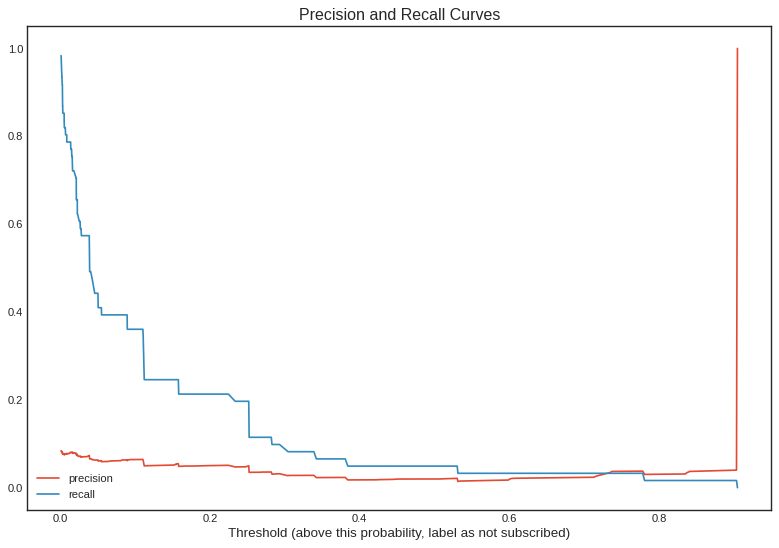

In [ ]:
#precision/recall graph LG_model

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, model.predict_proba(X_test)[:,1] )
plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as not subscribed)');
plt.title('Precision and Recall Curves');

# **Hyperparameter-tuned Logistic Regression**
Fitting the model using logistic regression with parameter tuning and determine its accuracy



In [ ]:
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

LogisticRegression(C=51.79474679231202, random_state=0)
The mean accuracy of the model is: 0.9314685314685315


In [ ]:
logreg = LogisticRegression(C=0.18420699693267145, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[652   2]
 [ 47  14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       654
           1       0.88      0.23      0.36        61

    accuracy                           0.93       715
   macro avg       0.90      0.61      0.66       715
weighted avg       0.93      0.93      0.91       715




**Insights:**

This Classification report reveals that we have a 93% precision, meaning the model classifier didn't label an instance as positive when it was really negative, which is important since we shouldn't label a lead as positive when he/she is not interested in making a term deposit


# **ROC Curve**

In order to evaluate the classifier, the following graph can be helpful. The ROC curve represents the graph of the pair (1 - False Positive Rate, True Positive Rate) at various threshold values. The curve should be close to the upper left corner, as shown in the following: 

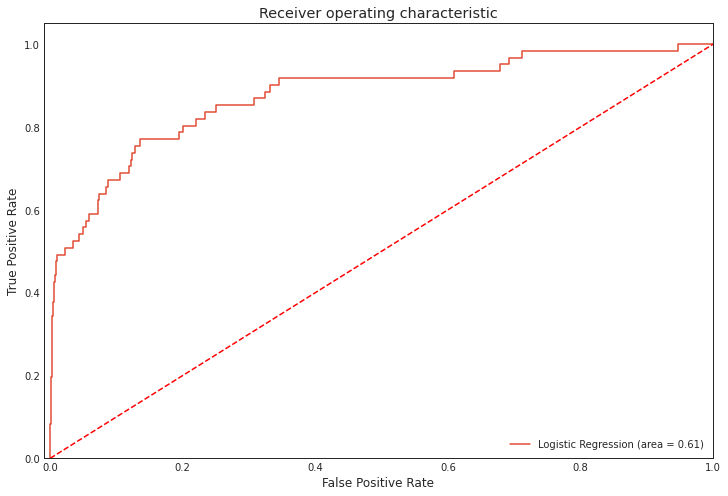

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## **Support vector classifier**

In [ ]:
svc_classifier = SVC(random_state = 0)
svc_classifier.fit(X_train,y_train)
y_pred=svc_classifier.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.9146853146853147
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.96       654
           1       0.00      0.00      0.00        61

    accuracy                           0.91       715
   macro avg       0.46      0.50      0.48       715
weighted avg       0.84      0.91      0.87       715



According to reports, the accuracy rate of 91%